# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнила студентка гр. 3385 Мучник Мария Константиновна. Вариант №10

## Цель работы

Овладеть навыками работы с математическими пакетами для моделиро
вания, визуализации и анализа социальных сетей.

## Основные теоретические положения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{n(n-1)}$$

где $L$ - количество рёбер, $n$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$

### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$



### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек про
вести анализ заданных социальных сетей вычислить описательные ха
рактеристики. Полученные результаты содержательно проинтерпрети
ровать.

## Выполнение работы

0. Установка библиотек

In [55]:
system('sudo apt-get install -y libglpk-dev libgmp-dev')
# Для работы на виртуальной машине

In [56]:
install.packages("igraph", repos = "https://cloud.r-project.org/")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. Извлечение социоматрицы и вывод её на экран

In [57]:
data <- read.csv("florentine_marital.csv", skip = 1)
# Чтение матрицы

sociomatrix <- matrix(as.numeric(unlist(data[])),
                     nrow = nrow(data),
                     ncol = ncol(data))
# Извлечение матрицы (представление в виде вектора с числами)
print(sociomatrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    1     0     0     0     0
 [2,]    0    0    0    0    0    1    1    0    1     0     0     0     0
 [3,]    0    0    0    0    1    0    0    0    1     0     0     0     0
 [4,]    0    0    0    0    0    0    1    0    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     1     0     0
 [6,]    0    1    0    0    0    0    0    0    0     0     0     0     0
 [7,]    0    1    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    0    0    0    1    0    0     0     0     0     0
 [9,]    1    1    1    0    0    0    0    0    0     0     0     0     1
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    1    1    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

2. Преобразовение социоматрицы в список рёбер, вывод первых 5 элементов

In [58]:
g <- graph_from_adjacency_matrix(sociomatrix, mode='undirected')
edges <- as_data_frame(g, what='edges') # Выбор из графа список ребер
print('Первые 5 элементов списка рёбер:')
print(head(edges, 5))

[1] "Первые 5 элементов списка рёбер:"
  from to
1    1  9
2    2  6
3    2  7
4    2  9
5    3  5


3. Присвоение имён столбцам и строкам социоматрицы

In [59]:
names_string <- 'Acciaiuoli, Albizzi, Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Pucci, Ridolfi, Salviati, Strozzi, Tornabuoni'
column_names <- strsplit(names_string, ", ")[[1]]
rownames(sociomatrix) <- column_names
colnames(sociomatrix) <- column_names
print(sociomatrix)

             Acciaiuoli Albizzi Barbadori Bischeri Castellani Ginori Guadagni
Acciaiuoli            0       0         0        0          0      0        0
Albizzi               0       0         0        0          0      1        1
Barbadori             0       0         0        0          1      0        0
Bischeri              0       0         0        0          0      0        1
Castellani            0       0         1        0          0      0        0
Ginori                0       1         0        0          0      0        0
Guadagni              0       1         0        1          0      0        0
Lamberteschi          0       0         0        0          0      0        1
Medici                1       1         1        0          0      0        0
Pazzi                 0       0         0        0          0      0        0
Peruzzi               0       0         0        1          1      0        0
Pucci                 0       0         0        0          0   

4. Построение ненаправленной сети

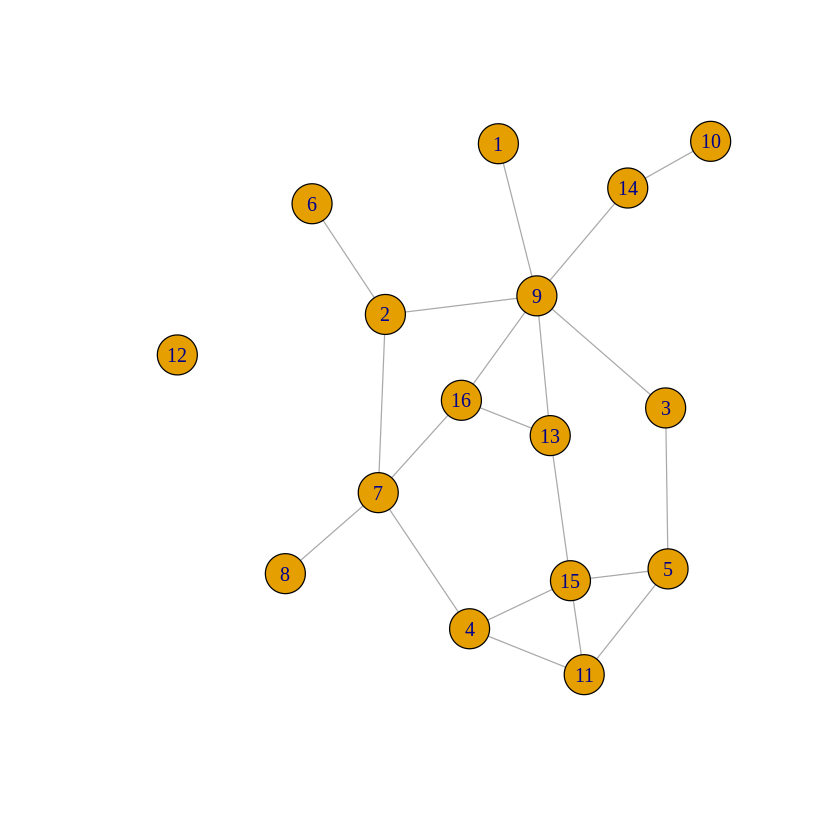

In [60]:
plot(g)

5. Отображение сети с помощью алгоритмов укладки Фрюхтермана-Рейнгольда и Камада-Каваи. Объяснить различие между алгоритмами и укладками

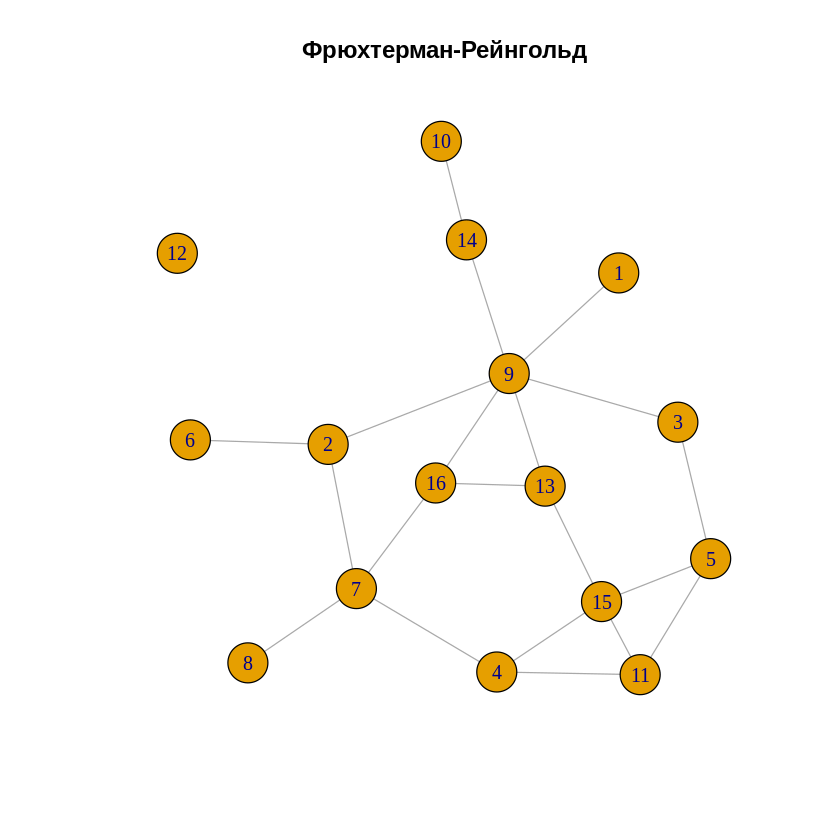

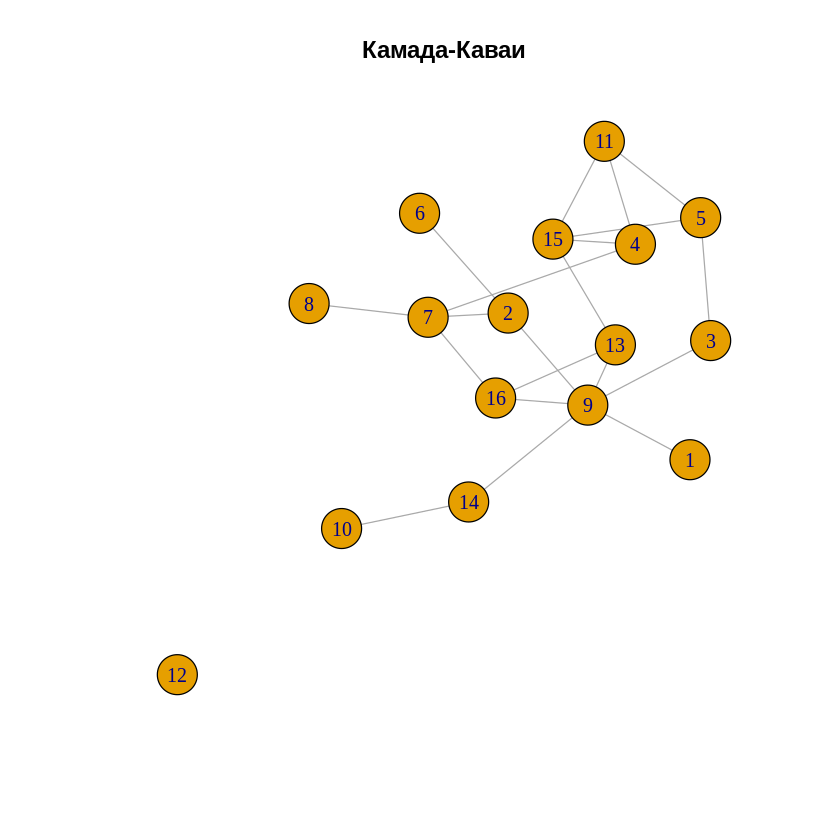

In [61]:
plot(g, main='Фрюхтерман-Рейнгольд', layout = layout_with_fr)
plot(g, main='Камада-Каваи', layout = layout_with_kk)

### Алгоритмы составлены на основе разных принципов
**Первый алгоритм** использует физическую модель взаимодействия частиц, где связанные вершины притягиваются друг к другу, а все остальные - отталкиваются. На основе этих сил вычисляется результирующее перемещение для каждой вершины. Процесс имитирует постепенное "остывание" системы - с каждым шагом интенсивность перемещений уменьшается, что позволяет графу плавно приходить к устойчивому состоянию.

**Второй алгоритм** ориентирован на достижение идеального соответствия между фактическими расстояниями на плоскости и структурными расстояниями в графе. Он вычисляет кратчайшие пути между всеми парами вершин и затем минимизирует расхождение между этими структурными расстояниями и реальными геометрическими. На каждом этапе алгоритм идентифицирует вершину, вносящую наибольший вклад в общую "энергию" системы, и перемещает её для уменьшения общего несоответствия.

6. Вывод «описательной сводки» сети

In [62]:
# Установка недостающих библиотек
install.packages("intergraph")
library(intergraph)

install.packages("statnet")
library(statnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [83]:
# Преобразование igraph в statnet
sg <- asNetwork(g)
summary(sg)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 20 
   missing edges = 0 
   non-missing edges = 20 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    1    9
 [2,]    2    6
 [3,]    2    7
 [4,]    2    9
 [5,]    3    5
 [6,]    3    9
 [7,]    4    7
 [8,]    4   11
 [9,]    4   15
[10,]    5   11
[11,]    5   15
[12,]    7    8
[13,]    7   16
[14,]    9   13
[15,]    9   14
[16,]    9   16
[17,]   10   14
[18,]   11   15
[19,]   13   15
[20,]   13   16

- 16 вершин
- ненаправленный
- нет петель
- не мультиграф
- не гиперграф
- не двудольный
- 20 рёбер
- нет рёбер, помеченных как отсутствующие
- плотность графа = 0.17
- 16 допустимых имен вершин
- нет имен рёбер

 7. Вычисление «пятичисловой сводки» сети

In [84]:
cat("Количество вершин:", network.size(sg), "\n")

N <- network.size(sg)
cat("Плотность вручную:", round((2*network.edgecount(sg))/(N*(N - 1)), 3), "\n")
# Граф ненаправленный, следовательно надо поделить количество рёбер на количество пар из вершин
cat("Плотность, подсчитанная функцией:", round(gden(sg), 3), "\n")

cat("Число компонент связности исходя из раскладки:", 2, "\n")
cat("Число компонент связности, подсчитанное функцией:", components(g)$no, "\n")

max_component <- component.largest(sg, result = "graph")
# Находим наибольшую компоненту связности
min_ways <- geodist(max_component)
# Матрица кратчайших путей для наибольшей компоненты связности
cat("Диаметр сети:", max(min_ways$gdist), "\n")

cat("Коэффициент кластеризации:", round(gtrans(sg, mode = "graph"), 3), "\n")

Количество вершин: 16 
Плотность вручную: 0.167 
Плотность, подсчитанная функцией: 0.167 
Число компонент связности исходя из раскладки: 2 
Число компонент связности, подсчитанное функцией: 2 
Диаметр сети: 5 
Коэффициент кластеризации: 0.191 


**Вывод:** граф разряженный, так как его плотность значительно меньше единицы, состоит из двух компонент связности, диаметр сети достаточно большой, что хорошо соотносится с маленькой плотностью графа, коэффициент кластеризации также не велик из-за малого количества рёбер

8. Вычисление меры центральности для неизолированных вершин

In [97]:
isolated <- which(sna::degree(sg, gmode="graph") == 0) # Изолированные вершины
non_isolated <- sg
non_isolated <- network::delete.vertices(non_isolated, isolated) # Оставляем только не изолированные
N <- network.size(non_isolated)
deg <- sna::degree(non_isolated, gmode="graph") # Вектор, содержащий степень для каждой вершины

closeness_cent <- sna::closeness(non_isolated) # Отнормируем, отн. центральности по близости
between_cent <- sna::betweenness(non_isolated) # Отнормируем по посреднечеству
info_cent <- sna::infocent(non_isolated)

centrality_table <- data.frame(
  Vertex = network.vertex.names(non_isolated),
  Norm_Degree = deg/(N - 1),
  Norm_Closeness = closeness_cent,
  Norm_Betweenness = between_cent/((N-1)*(N-2)),
  Norm_Information = info_cent/sum(info_cent)

)

cat("Таблица мер центральности:\n")
print(centrality_table, row.names = FALSE)

Таблица мер центральности:
 Vertex Norm_Degree Norm_Closeness Norm_Betweenness Norm_Information
      1  0.07142857      0.3684211       0.00000000       0.04943215
      2  0.21428571      0.4827586       0.21245421       0.07408484
      3  0.14285714      0.4375000       0.09340659       0.06816655
      4  0.21428571      0.4000000       0.10439560       0.07427531
      5  0.21428571      0.3888889       0.05494505       0.07093098
      6  0.07142857      0.3333333       0.00000000       0.04309479
      7  0.28571429      0.4666667       0.25457875       0.08190476
      8  0.07142857      0.3255814       0.00000000       0.04562892
      9  0.42857143      0.5600000       0.52197802       0.09502877
     10  0.07142857      0.2857143       0.00000000       0.03515798
     11  0.21428571      0.3684211       0.02197802       0.06953773
     13  0.21428571      0.5000000       0.11355311       0.08040678
     14  0.14285714      0.3888889       0.14285714       0.05337198
     15

Таблица мер центральности:
$n_i$ | $C'_D(n_i)$ | $C'_C(n_i)$ | $C'_B(n_i)$ | $C'_I(n_i)$
-|----|----|----|----
1 | 0.07 | 0.37 | 0.00 | 0.05
2 | 0.21 | 0.48 | 0.21 | 0.07
3 | 0.14 | 0.44 | 0.09 | 0.07
4 | 0.21 | 0.40 | 0.10 | 0.07
5 | 0.21 | 0.39 | 0.05 | 0.07
6 | 0.07 | 0.33 | 0.00 | 0.04
7 | 0.29 | 0.47 | 0.25 | 0.08
8 | 0.07 | 0.33 | 0.00 | 0.05
9 | 0.43 | 0.56 | 0.52 | 0.10
10 | 0.07 | 0.29 | 0.00 | 0.04
11 | 0.21 | 0.37 | 0.02 | 0.07
13 | 0.21 | 0.50 | 0.11 | 0.08
14 | 0.14 | 0.39 | 0.14 | 0.05
15 | 0.29 | 0.44 | 0.10 | 0.08
16 | 0.21 | 0.48 | 0.09 | 0.08

**Вывод:** значение центральностей отличается друг от друга так как они имеют различный смысл.

## Повтор пунктов для направленного графа

1. Извлечение социоматрицы и вывод её на экран

In [98]:
# Создание матрицы из данных
data2 <- read.csv("krackhardt_friendship.csv", header = FALSE, skip = 2)

sociomatrix2 <- matrix(as.numeric(unlist(data2[])),
                     nrow = nrow(data2),
                     ncol = ncol(data2))

print(sociomatrix2)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    1    0    1    0    0    0    1    0     0     0     1     0
 [2,]    1    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    1    1    0    0    0    0    0    1    0     0     0     1     0
 [5,]    0    1    0    0    0    0    0    0    1     0     1     0     0
 [6,]    0    1    0    0    0    0    1    0    1     0     0     1     0
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    0    1    0    0    0    0    0     0     0     0     0
 [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[10,]    0    0    1    0    1    0    0    1    1     0     0     1     0
[11,]    1    1    1    1    1    0    0    1    1     0     0     1     1
[12,]    1    0    0    1    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

2. Преобразовение социоматрицы в список ребер, вывод первых 5 элементов

In [99]:
g2 <- graph_from_adjacency_matrix(sociomatrix2)
edges <- as_data_frame(g2, what = "edges")
print("Первые 5 элементов списка рёбер:")
print(head(edges, 5))

[1] "Первые 5 элементов списка рёбер:"
  from to
1    1  2
2    1  4
3    1  8
4    1 12
5    1 16


3. Присвоение имён столбцам и строкам социоматрицы

In [100]:
column_names2 <- c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21")
rownames(sociomatrix2) <- column_names2
colnames(sociomatrix2) <- column_names2
print(sociomatrix2)

   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
1  0 1 0 1 0 0 0 1 0  0  0  1  0  0  0  1  0  0  0  0  0
2  1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  1  0  0  1
3  0 0 0 0 0 0 0 0 0  0  0  0  0  1  0  0  0  0  1  0  0
4  1 1 0 0 0 0 0 1 0  0  0  1  0  0  0  1  1  0  0  0  0
5  0 1 0 0 0 0 0 0 1  0  1  0  0  1  0  0  1  0  1  0  1
6  0 1 0 0 0 0 1 0 1  0  0  1  0  0  0  0  1  0  0  0  1
7  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
8  0 0 0 1 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
9  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
10 0 0 1 0 1 0 0 1 1  0  0  1  0  0  0  1  0  0  0  1  0
11 1 1 1 1 1 0 0 1 1  0  0  1  1  0  1  0  1  1  1  0  0
12 1 0 0 1 0 0 0 0 0  0  0  0  0  0  0  0  1  0  0  0  1
13 0 0 0 0 1 0 0 0 0  0  1  0  0  0  0  0  0  0  0  0  0
14 0 0 0 0 0 0 1 0 0  0  0  0  0  0  1  0  0  0  0  0  0
15 1 0 1 0 1 1 0 0 1  0  1  0  0  1  0  0  0  0  1  0  0
16 1 1 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0
17 1 1 1 1 1 1 1 1 1  1  1  1  

4. Построение ненаправленной сети

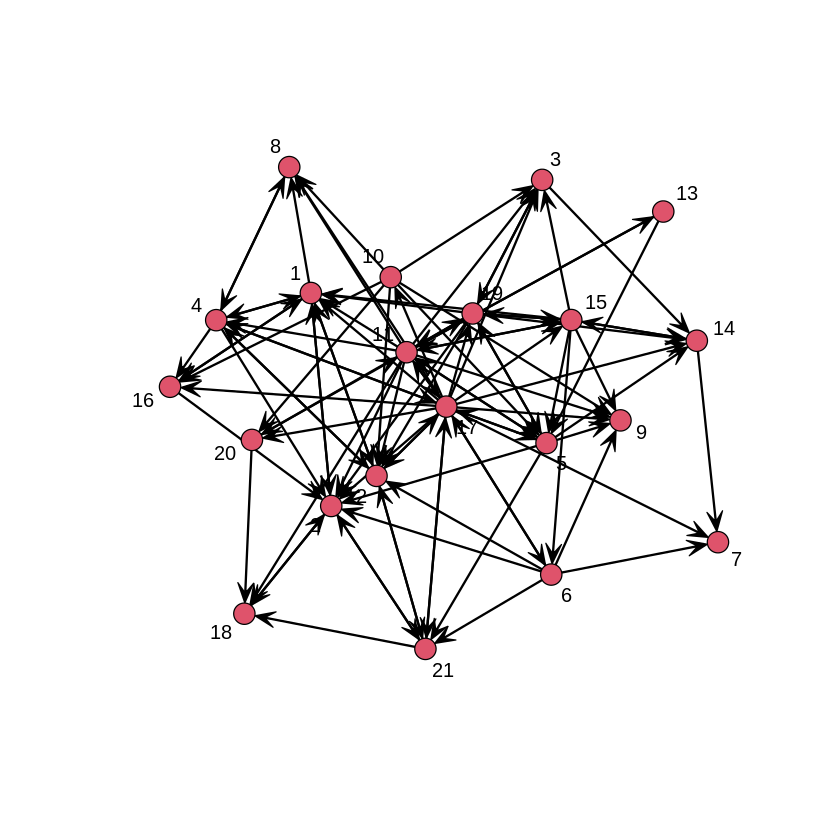

In [101]:
gplot(sociomatrix2, vertex.col = 2, displaylabels = TRUE)

5. Отображение сети с помощью алгоритмов укладки Фрюхтермана-Рейнгольда и Камада-Каваи. Объяснить различие между алгоритмами и укладками

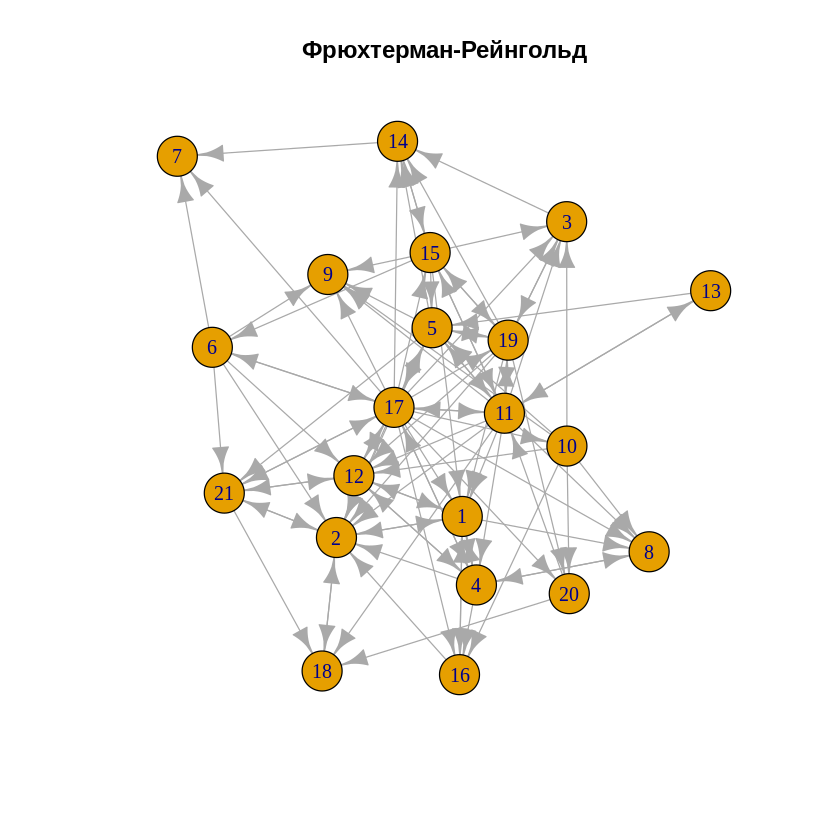

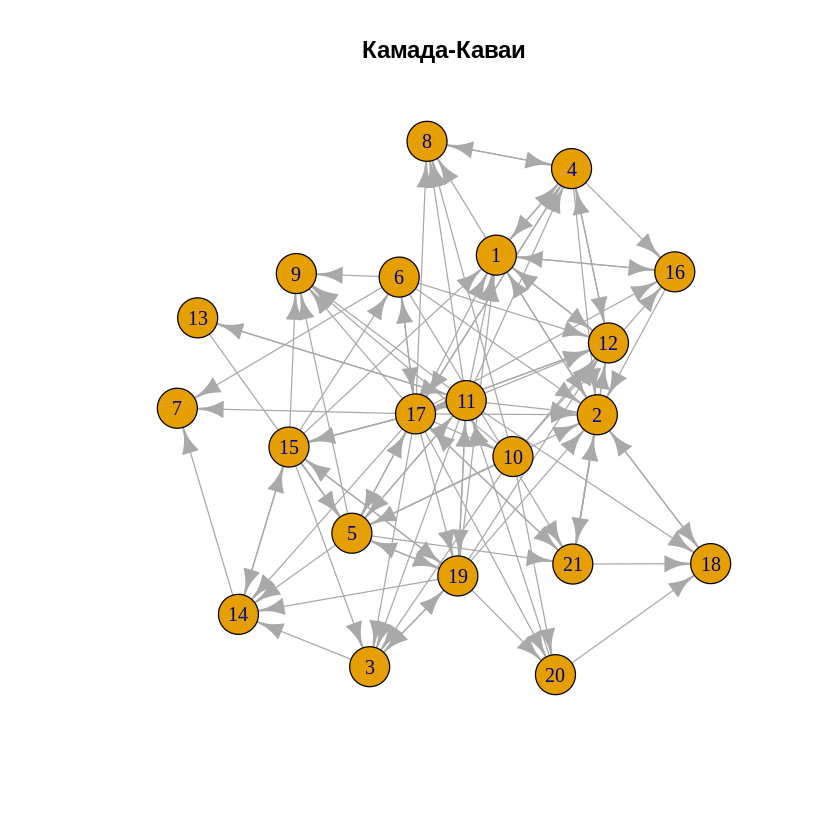

In [102]:
plot(g2, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)
plot(g2, main = "Камада-Каваи", layout = layout_with_kk)

6. Вывод «описательной сводки» сети

In [103]:
sg2 <- asNetwork(g2)
summary(sg2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    1    2
  [2,]    1    4
  [3,]    1    8
  [4,]    1   12
  [5,]    1   16
  [6,]    2    1
  [7,]    2   18
  [8,]    2   21
  [9,]    3   14
 [10,]    3   19
 [11,]    4    1
 [12,]    4    2
 [13,]    4    8
 [14,]    4   12
 [15,]    4   16
 [16,]    4   17
 [17,]    5    2
 [18,]    5    9
 [19,]    5   11
 [20,]    5   14
 [21,]    5   17
 [22,]    5   19
 [23,]    5   21
 [24,]    6    2
 [25,]    6    7
 [26,]    6    9
 [27,]    6   12
 [28,]    6   17
 [29,]    6   21
 [30,]    8    4
 [31,]   10    3
 [32,]   10    5
 [33,]   10    8
 [34,]   10    9
 [35,]   10   12
 [36,]   10   16
 [37,]   10   20


- 21 вершина
- направленный
- имеет петли
- не мультиграф
- не гиперграф
- не двудольный
- 103 ребра
- нет рёбер, помеченных как отсутствующие
- плотность графа = 0.23
- 21 допустимое имя вершин
- нет имен рёбер

 7. Вычисление «пятичисловой сводки» сети

In [104]:
cat("Количество вершин:", network.size(sg2), "\n")

N2 <- network.size(sg2)
cat("Плотность вручную:", round((network.edgecount(sg2))/(N2*(N2 - 1)), 4), "\n")
cat("Плотность, подсчитанная функцией:", round(gden(sg2), 4), "\n")

cat("Число компонент связности, подсчитанное функцией:", components(g2, mode="strong")$no, "\n")

max_component <- component.largest(sg2, result="graph")
min_ways <- geodist(max_component)
cat("Диаметр сети:", max(min_ways$gdist), "\n")

cat("Коэффициент кластеризации:", round(gtrans(sg2, mode="disgraph"), 3), "\n")

Количество вершин: 21 
Плотность вручную: 0.2429 
Плотность, подсчитанная функцией: 0.2429 
Число компонент связности, подсчитанное функцией: 3 
Диаметр сети: 5 
Коэффициент кластеризации: 0.461 


**Вывод:** граф умеренно плотный, состоит из трёх компоненты связности, диаметр сети относительно малый, коэффициент кластеризации близок к 0.5, что говорит о довольно большой вероятности наличия связи между двумя-тремя вершинами

8. Вычисление мер престижа

In [110]:
deg2 <- sna::degree(sg2, cmode="indegree")
N2 <- network.size(sg2)

closen <- igraph::closeness(g2, mode = "in", normalized = FALSE)
I_i <- colSums(is.finite(igraph::distances(g2, mode = "in")))
proximity <- I_i^2/((N2-1)*closen)

l1 <- ceiling(max(Re(eigen(sociomatrix2)$values))) # Макс. собственное значение
alpha <- 1/l1
x <- colSums(sociomatrix2) # Вектор исходящих степеней
I <- diag(length(x)) # Единичная матрица
Xt <- t(sociomatrix2)
Range <- solve((1/alpha)*I-Xt, x) # Центральность Каца

# A(n,k) = n!/(n-k)!
arrangements <- function(n, k) {
  if (k > n) return(0)
  return(factorial(n) / factorial(n - k))
}

# sum = ∑_{k=1}^{g-1} a^k * A(g-1, k)
calculate_sum <- function(a, g) {
  total <- 0
  for (k in 1:(g-1)) {
    total <- total + (a^k) * arrangements(g-1, k)
  }
  return(total)
}
Norm <- calculate_sum(alpha, N2)

prestige_table <- data.frame(
  Vertex = column_names2,
  Norm_Degree = deg2 / (N2 - 1),
  Norm_proximity = proximity/sum(proximity),
  Norm_Range = Range/Norm

)

cat("Таблица мер престижа:\n")
print(prestige_table, row.names = FALSE)

Таблица мер престижа:
 Vertex Norm_Degree Norm_proximity   Norm_Range
      1        0.40   0.0392051029 3.789183e-05
      2        0.50   0.0378049206 4.187203e-05
      3        0.25   0.0532069253 1.715288e-05
      4        0.25   0.0476061964 2.581405e-05
      5        0.30   0.0518067431 1.840930e-05
      6        0.10   0.0630082011 8.115914e-06
      7        0.15   0.0001428757 1.056874e-05
      8        0.25   0.0476061964 2.188543e-05
      9        0.30   0.0001270007 1.901159e-05
     10        0.05   0.0700091123 4.792978e-06
     11        0.30   0.0518067431 1.915552e-05
     12        0.40   0.0420054674 3.229332e-05
     13        0.05   0.0756098413 3.813434e-06
     14        0.25   0.0546071076 1.908850e-05
     15        0.20   0.0560072898 1.621253e-05
     16        0.20   0.0518067431 1.807199e-05
     17        0.30   0.0476061964 2.503279e-05
     18        0.20   0.0490063786 1.833375e-05
     19        0.25   0.0532069253 1.909807e-05
     20        0.1

## Выводы

Освоен инструментарий анализа сетей с использованием пакетов igraph и statnet. Сформированы практические навыки работы с сетевыми данными, включая: преобразование данных между различными форматами представления сетей, визуализацию графов с применением алгоритмов компоновки, вычисление базовых сетевых метрик и определение мер центральности и влияния вершин.